# Support Vector Machines



## Problem to solve: Do you think you can tell / heaven from hell?

* supervised learning

* classification of points in a space of dimension d: Find hyperplane (dimension d-1) to separate the points

* More formally: 
    - input: $\vec{x} = [x_1, x_2, \dots , x_d] $ with label $y_1$
    - find weights $\vec{w} = [w_1, w_2, \dots , w_d] $ and threshold $\theta$ 
    - output: if $\vec{w}\cdot\vec{x} > \theta$ then +1, if $\vec{w}\cdot\vec{x} < \theta$ then -1 
    - $\vec{w}$ defines a hyperplane
    
Let's plot it: d=2. 
The "hyperplane" becomes a straight line seperating the differently colored points. 


In [15]:
from lightning import Lightning
import math
from numpy import random, asarray, sqrt, arctan2, pi, clip, concatenate
#from sklearn import datasets


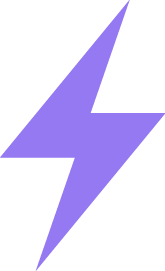

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [16]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')


In [17]:
halfn = 5
n = 2*halfn
mean = 4
# sample around zero
x_1_0 = random.randn(n)
x_2_0 = random.randn(n)
# sample around (mean,mean)
x_1_1 = random.randn(n) + mean
x_2_1 = random.randn(n) + mean
# concat both samples
x_1 = concatenate([x_1_0,x_1_1])
x_2 = concatenate([x_2_0,x_2_1])
label_0 = [0] * (n)
label_1 = [1] * (n)
labels = concatenate([label_0,label_1])
lgn.scatter(x_1, x_2, group=labels,  zoom=False)

### Naive Approach:
Find mean / median, connect with a line, draw line perpendicular at half distance. 

In [19]:
sigma=2
x_1_new0 = sigma*random.randn(n)
x_1_new1 = sigma*random.randn(n) + mean
x_2_new0 = sigma*random.randn(n)
x_2_new1 = sigma*random.randn(n) + mean
x_1_all = concatenate([x_1,x_1_new0,x_1_new1])
x_2_all = concatenate([x_2,x_2_new0,x_2_new1])
label_0 = [0] * (n)
label_1 = [1] * (n)
label_new = [2] * (2*n)
labels_new = concatenate([label_0,label_1,label_new])

lgn.scatter(x_1_all, x_2_all,  group=labels_new, zoom=False)

## perceptrons 

*  But we know how to do that already, we learned perceptrons, right? [https://appsworks.td.teradata.com/display/BBB/13th+July+2016+%3A+Perceptron]

### and their problems
* Data is linearly separable -> doesn’t converge
* Hyperplane found may not be the “best” - just any that separates the points

## Best Hyperplane
maximize the margin - find the broadest road between the dot clouds 

![title](Downloads/mmds_ch12_maximize_margin.png)
Figure: MaxMargin

Only the closest points count - "support vectors".


## The Ng Approach : Start with the utility function

(Modified from the one in logistic regression)

![title](Downloads/andrew_ng_week7_video1_minute14.png)

"In case this equation looks a bit unfamiliar, this is because previously we had a minus sign ... "
or you didn't do the weeks 1 - 6 of the course. And aren't familiar with logistic regression etc.
Even with this, he dedicates 19 min video to "The Mathematics Behind the Large Margin Classifier".

But let's have a look at it.
C is the regularization parameter. Assume for now that it is big, say, 100000. Then you really want to get the first term to zero. 
What are cost1, cost0? 
![title](Downloads/mmd_ch12_costfunction.png)






Main thing is: Classify all correctly, and it's zero.
Second term: Forces "line to turn" until the margin is maximized. 

## Case: Not linearly separable

Transform to higher dimension, solve there, transform back
### Problems:
* Calculation gets expensive
* The transformed hyperplane is crazy complex, unusable
* Overfitting

Kerneltrick helps with this - If I get this right, no calculations, much nicer hyperplane, but overfitting is still a problem.

Or allow misclassification - find a balance between misclassification punishment and widest margin by chosing C.


In [20]:
nl=300
inner=2
xnl_1 = 2*random.randn(nl)
#print(len(x_0))
xnl_2 = 2*random.randn(nl) 
#print(len(x))
labels_nl=[1]*nl
for i in range(nl):
    if ( xnl_1[i]**2 + xnl_2[i]**2 ) < inner:
        labels_nl[i] = 0

lgn.scatter(xnl_1, xnl_2,  group=labels_nl, zoom=False)

See this as a mountain, and cut the top.

(Average would not work at all here, same point!)

## Dirty Data ?!

Remember that only the points closest to the boundary count (typically, d+1 points). What does this mean for robustness? 
Our naive approach works better here.


### SVM vs Logistic Regression (Ng)

* A. d dimension (number of features), n number of samples: 
d large compared to n: Use logistic regression, or SVM without kernel. Example: Spam Classification, d=10000, n=1000.
* B. d is small, n medium sized: Use SVM with linear / Gaussian kernel
* C. d is small, n is big: SVM would run long, find more features and back to case A

linear regression and SVM without kernel are pretty similar for most combinations of d and n

SVM is strong with Kernels for d<1000, n=1000 up to n=50000

Or use neural network - takes some training time

## Applications of Support-Vector Machines (Segaran)

* Classifying facial expressions
* Detecting intruders using military datasets
* Predicting the structure of proteins from their sequences
* Handwriting recognition
* Determining the potential for damage during earthquakes

## Calculation: How to find that minimum


quadratic programming, but not well suited to large datasets because (normally) keeps all in memory. Better use gradient descent and keep data on disc. 

In [21]:
from sklearn import svm
#lgn.scatter(x_all, y_all,  group=labels, zoom=False)
X = [[0,0] for x in range(2*n)]
for i in range(2*n):
    X[i][0]=x_1[i]
    X[i][1]=x_2[i]
    

clf = svm.SVC()
clf.fit(X, labels)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
clf.predict([[0, 0]])


array([0])

In [23]:
clf.predict([[mean,mean]])

array([1])

In [29]:
clf.predict([[mean/2-0.8,mean/2-0.6]])

array([0])

In [30]:
# lgn.scatter(xnl_1, xnl_2,  group=labels_nl, zoom=False)
print(2*nl)
X_nl = [[0,0] for x in range(nl)]
for i in range(nl):
    X_nl[i][0]=xnl_1[i]
    X_nl[i][1]=xnl_2[i]
    

clf_nl = svm.SVC()
clf_nl.fit(X_nl, labels_nl)  

600


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
clf.predict([[0, 0]])

array([0])

In [32]:
clf.predict([[2, 2]])

array([1])

## Sources and Literature

* https://de.wikipedia.org/wiki/Support_Vector_Machine 

* https://en.wikipedia.org/wiki/Support_vector_machine

* Mining Massive Datasets, http://www.mmds.org/ , book, 12.7

* Toby Segaran, Programming Collective Intelligence, chapter 9
 
* Andrew Ng, Coursera, week 7; e.g. http://www.holehouse.org/mlclass/12_Support_Vector_Machines.html
